In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_gen = pd.read_csv('data/EB++AdjustPANCAN_IlluminaHiSeq_RNASeqV2.geneExp.xena', sep='\t')
df_meta = pd.read_csv('data/Survival_SupplementalTable_S1_20171025_xena_sp', sep='\t')

In [3]:
df_gen.head()

,sample,TCGA-OR-A5J1-01,TCGA-OR-A5J2-01,TCGA-OR-A5J3-01,TCGA-OR-A5J5-01,TCGA-OR-A5J6-01,TCGA-OR-A5J7-01,TCGA-OR-A5J8-01,TCGA-OR-A5J9-01,TCGA-OR-A5JA-01,...,TCGA-CG-4449-01,TCGA-CG-4462-01,TCGA-CG-4465-01,TCGA-CG-4466-01,TCGA-CG-4469-01,TCGA-CG-4472-01,TCGA-CG-4474-01,TCGA-CG-4475-01,TCGA-CG-4476-01,TCGA-CG-4477-01
0,100130426,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100133144,2.09,1.88,1.45,0.00,0.00,1.12,1.29,0.00,2.45,...,2.42,2.74,2.64,3.99,4.40,3.00,4.27,3.71,4.29,4.24
2,100134869,2.30,3.32,2.92,1.35,2.45,2.82,1.72,1.24,2.60,...,1.87,2.12,1.78,2.60,3.66,3.87,3.07,3.65,3.64,3.99
3,10357,7.23,6.36,6.45,5.78,6.09,6.71,6.58,6.31,6.13,...,9.31,8.20,9.43,9.14,10.02,9.32,9.54,8.99,9.48,9.46
4,10431,10.99,10.35,10.04,11.20,10.30,10.87,9.96,10.78,10.25,...,10.23,9.33,10.21,9.38,9.34,10.34,10.17,10.43,9.93,10.76


In [4]:
# Set the gene ID as the index so all columns are numeric patient data
if 'sample' in df_gen.columns:
    df_gen = df_gen.set_index('sample')

# 1. Basic Dimensions
print(f"Total Genes: {df_gen.shape[0]}")
print(f"Total Patients: {df_gen.shape[1]}")

# 2. Check for Missing Values (NaNs)
nan_count = df_gen.isnull().sum().sum()
print(f"Total Missing Values: {nan_count}")

# 3. Check for Sparsity (Zero values)
# Many RNA-seq datasets have many zeros.
zero_count = (df_gen == 0).sum().sum()
total_cells = df_gen.size
sparsity = zero_count / total_cells
print(f"Sparsity (Percentage of Zeros): {sparsity:.2%}")

Total Genes: 20531
Total Patients: 11069
Total Missing Values: 3973192
Sparsity (Percentage of Zeros): 12.40%


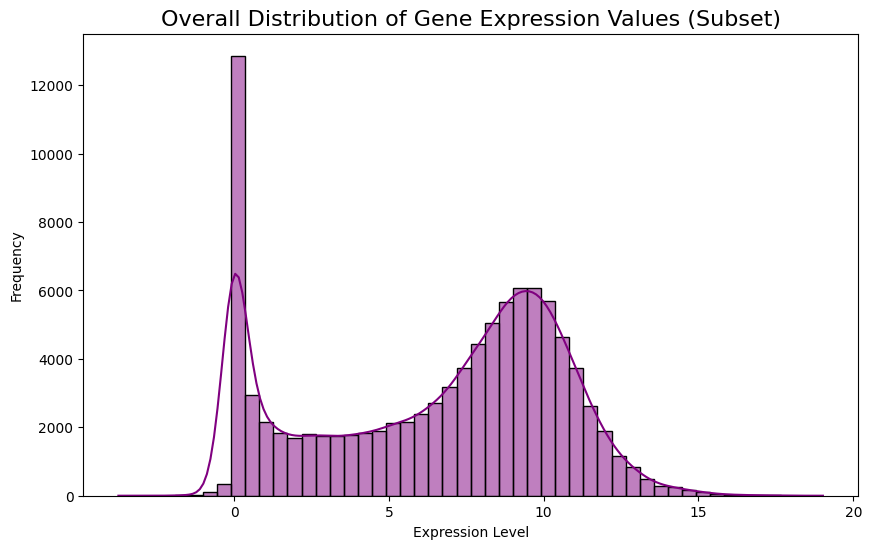

In [5]:
# We take a random sample of 100,000 values to speed up plotting
# (Plotting 20k genes * 11k patients would crash the kernel)
sample_values = df_gen.values.flatten()
np.random.shuffle(sample_values)
subset_values = sample_values[:100000]

plt.figure(figsize=(10, 6))
sns.histplot(subset_values, bins=50, kde=True, color='purple')
plt.title("Overall Distribution of Gene Expression Values (Subset)", fontsize=16)
plt.xlabel("Expression Level")
plt.ylabel("Frequency")
plt.show()

/var/folders/3b/jd8k5j055rx3c991jlh5x05h0000gn/T/ipykernel_95251/881691691.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_variable_genes.values, y=top_variable_genes.index, palette='magma')


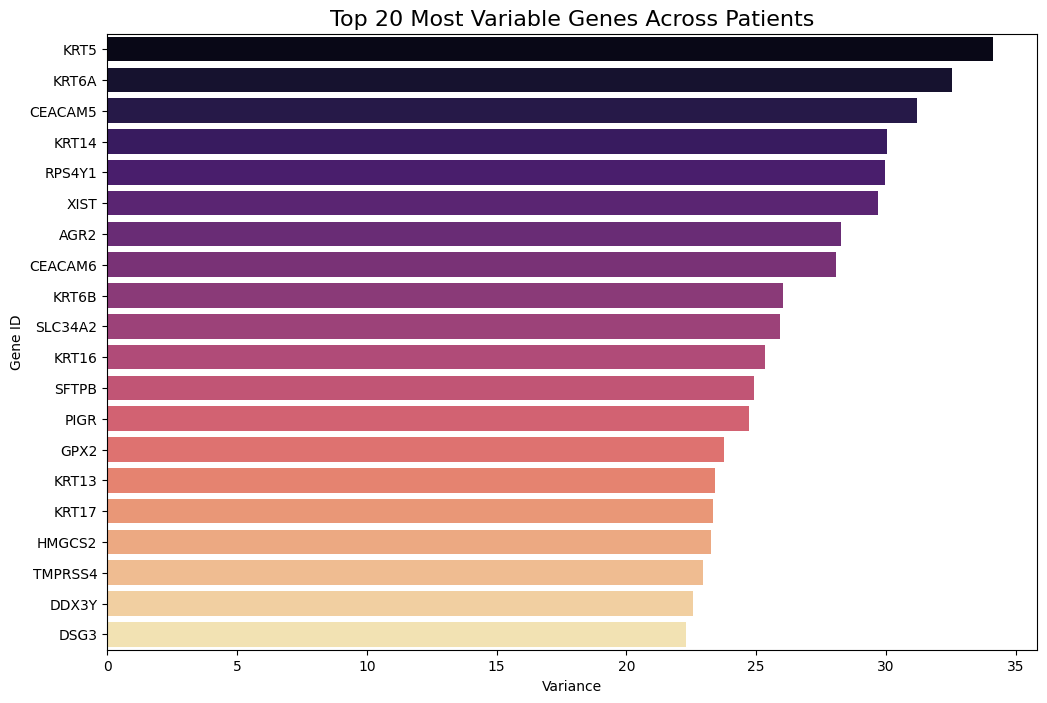

In [6]:
# Calculate variance for each gene (row) across all patients
gene_variances = df_gen.var(axis=1)

# Sort and take top 20 most variable genes
top_variable_genes = gene_variances.sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_variable_genes.values, y=top_variable_genes.index, palette='magma')
plt.title("Top 20 Most Variable Genes Across Patients", fontsize=16)
plt.xlabel("Variance")
plt.ylabel("Gene ID")
plt.show()

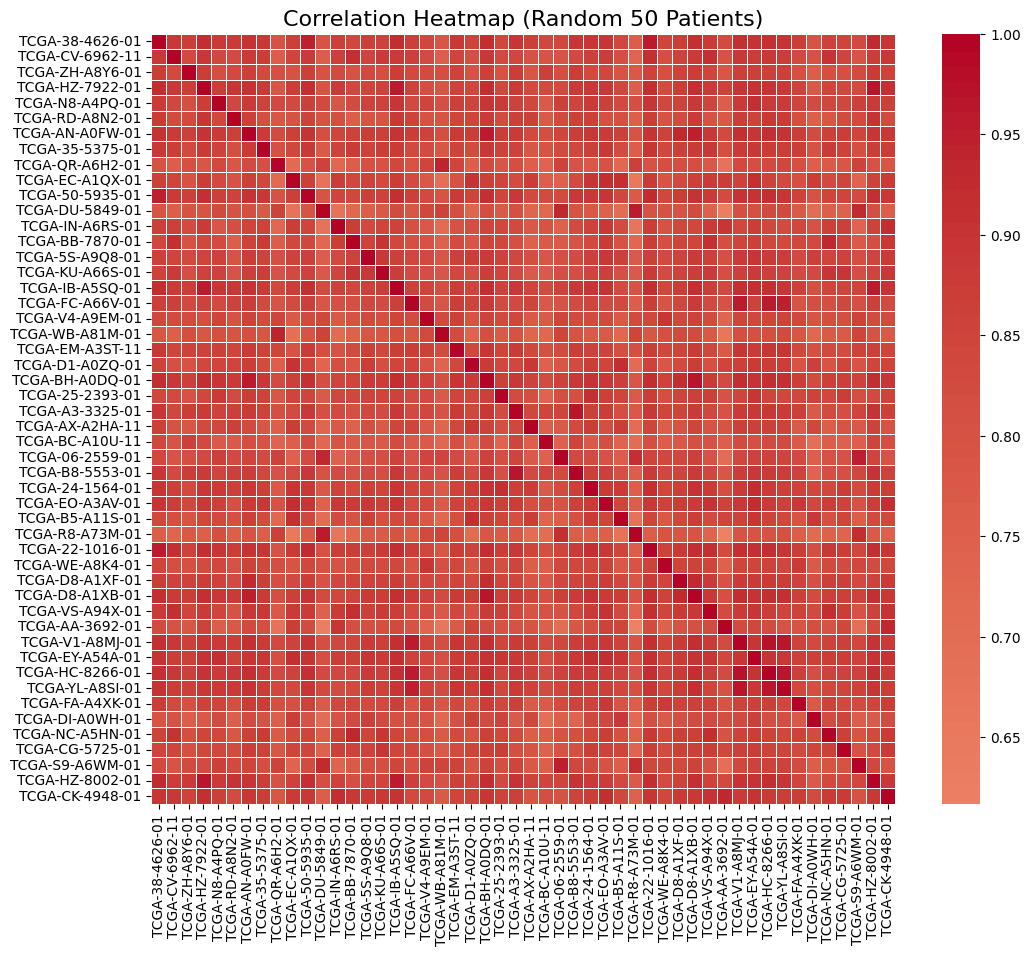

In [8]:
# Select a random subset of 50 patients for visualization
subset_patients = df_gen.sample(n=50, axis=1)

# Calculate correlation matrix between these patients
corr_matrix = subset_patients.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap (Random 50 Patients)", fontsize=16)
plt.show()